<div style="border:solid Chocolate 2px; padding: 40px">
<b>Привет, Дмитрий!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду тимлилом твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом!
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div class="alert alert-success">
Решение полностью правильное, или я посчитала нужным тебя за что-то похвалить :) На такие решения можно опираться в будущих проектах.
</div>

<div class="alert alert-warning">
Решение станет еще лучше, если внести небольшие коррективы. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (но это не обязательно).
</div>
<div class="alert alert-block alert-danger">
Решение требует существенной переработки. Напомню, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
<br/>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. **Также обрати внимание, что все три части работы (план, код, отчет) должны идти подряд в одном блокноте. Приступая к следующей части, пожалуйста, не удаляй и не изменяй предыдущие.** Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀

Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Проект "Кто следущий?"

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<div class="alert alert-success">
<h3> Комментарий тимлида (план) <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Очень хорошо, что оставляешь в начале проекта его описание! Любой, кто захочет взглянуть на работу, сможет сразу погрузиться в суть задачи :)

### Цель проекта

Создать модель, позволяющую на основе данных, предоставленных провайдером выявлять клиентов, которые потенциально могут расторгнуть договор обслуживания.

In [1]:
#pip install skimpy -q

In [2]:
#pip install category_encoders -q

In [3]:
#pip install shap --user -q

In [4]:
%%capture
#install phik (if not installed yet)
import sys

!"{sys.executable}" -m pip install phik
!"{sys.executable}" -m pip install category_encoders
!"{sys.executable}" -m pip install skimpy
!"{sys.executable}" -m pip install shap

<div class="alert alert-warning">
<h3> Комментарий тимлида (план)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы при установке не вылезала эта информация, в конце строки можно добавлять `-q`

In [5]:
import re
import pandas as pd
import numpy as np
from numpy import (
    argmax,
    arange,
    sqrt
)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta,date
from timeit import default_timer as timer
from scipy import stats as st
from skimpy import clean_columns
import shap 
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import category_encoders as ce
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score, 
    f1_score,
    roc_curve,
    recall_score,
    precision_score,
    confusion_matrix
)

from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
sns.set()

RANDOM = 190623

## Загрузка и обзор данных

In [6]:
#старт времени выполнения
start_note_time = timer()

Данные будут загружены в следующие датафреймы:<br>

**dc** - contract_new.csv — информация о договоре;<br>
**dp** - personal_new.csv — персональные данные клиента;<br>
**di** - internet_new.csv — информация об интернет-услугах;<br>
**dph** - phone_new.csv — информация об услугах телефонии.

In [7]:
try:    
    dc = pd.read_csv('/datasets/contract_new.csv')
    dp = pd.read_csv('/datasets/personal_new.csv')
    di =  pd.read_csv('/datasets/internet_new.csv')
    dph =  pd.read_csv('/datasets/phone_new.csv')
except:
    dc = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    dp = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    di =  pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    dph =  pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

#### Сбор информации о датафреймах

In [8]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
dph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [12]:
dc.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [13]:
dp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
di.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [15]:
dph.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


#### Проверка на дубликаты

Во всех полях, кроме **customerID** сведения могут совпадать, поэтому проверке на дубликаты подвергается только **customerID**

In [16]:
dc.duplicated(['customerID']).sum()

0

In [17]:
dp.duplicated(['customerID']).sum()

0

In [18]:
di.duplicated(['customerID']).sum()

0

In [19]:
dph.duplicated(['customerID']).sum()

0

Проверка поля TotalCharges

In [20]:
dc[dc['TotalCharges'].str.contains(" ")]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Сведения отсутствуют в связи с отсуствием оплаты по договору, который был заключен в день предоставления данных заказчиком (01 февраля 2020 года).<br>

<del>Эти данные можно удалить в связи с их ничтожным влиянием на общую картину</del>

<div class="alert alert-info">
<b>Доработка:</b>
<br>
Отсутствующие данные в <b>TotalCharges</b> заполним помесячной оплатой
</div>

<div class="alert alert-warning">
<h3> Комментарий тимлида (план) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Удаление - тоже приемлемый вариант, но я больше все-таки склоняюсь к заполнению ежемесячной оплатой. Почему не совсем поддерживаю удаление: на практике вероятнее всего через нашу модель регулярно будут пропускаться абсолютно все действующие клиенты, если мы удалим из выборки всех новых клиентов и при этом выберем модели на основе деревьев, может случиться так, что из-за плохой масштабируемости деревьев наша модель на новых клиентах будет работать не совсем так, как мы того ожидаем.

<div class="alert alert-success">
<h3> Комментарий тимлида (план) 2<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> 😉

<div class="alert alert-info">
<b>Доработка:</b>
<br>

Аномальные значения в столбцах

In [21]:
for n in dc.columns:
    print(dc[n].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '2016-06-01' '2015-08-01' '2015-11-01' '2014-06-01' '201

In [22]:
for n in dp.columns:
    print(dp[n].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']


In [23]:
for n in di.columns:
    print(di[n].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['DSL' 'Fiber optic']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [24]:
for n in dph.columns:
    print(dph[n].unique())

['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
['No' 'Yes']


 Нетипичных категорий в категориальных признаках не выявлено

Аномальные значения в числовх данных будут рассмотрены позже после предобработки

### Вывод (обзор данных)

Исходные датафреймы пропусков и дубликатов не имеют.<br>
Аномальных и нетипичных значений не выявлено<br>
Таблицы dc и dp имеют одинаковое количество записей, поэтому, возможно, в них содержатся сведения об одних и тех же абонентах. Точнее можно будет сказать при объединении таблиц.<br>
В таблице dc поле **BeginDate** требуется привести к типу **data**. **TotalCharges** необходимо привести к **float**, предварительно удалив строки, содержащие пробелы (договор только что заключен и не оплачен)<br>
По всей видимости, данные экспортировались неправильно из какой-либо базы данных.<br>
Наименования столбцов необходимо привести к нижнему регистру с нижним подчеркиванием.<br>


В качестве целевого признака необходимо будет создать отдельный бинарный столбец на основе **EndDate**, в котором 1 - наличие договора о расторжении, 0 - в противном случае.<br>
Необходимо создать поле c количеством дней, прошедших с момента заключения договора, до даты 1 февраля 2020. На его основе, в частности можно будет проверить аномальные сроки действия договоров<br>

Для дальнейшего анализа данных и последущего моделирования необходимо будет исходные датафреймы объединять по **customerID**<br>

После слияния и заполнения пропусков бинарные значения Yes и No заменить на 0, 1

<div class="alert alert-warning">
<h3> Комментарий тимлида (план)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> При первичном анализе также важно проверить наличие каких-то ошибок: явно выбывающихся значений в числовых признаках и нетипичных категорий в категориальных.

<div class="alert alert-success">
<h3> Комментарий тимлида (план) 2<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> 😉

### План работы

1. Предобработка данных и конструирование новых признаков <br>

Выполнить обработку имен столбцов, работа с типами данных, удаление дубликатов, создание новых столбцов, слияние таблиц (merge), заполнение образовавшихся пропусков

2. Исследовательский анализ данных (EDA)<br>

Выявление закономерностей функционирования системы данных, которые, возможно, позволят выявить существенные признаки, потенциально оказывающих влияние на построение модели (построение "портрета" клиента, баланс классов, развитие структуры в динамике, построение визуализаций)

3. Исследование мультиколлинеарности<br>

Выявление зависимости между признаками, коллинеарность признаков с целевым признаком<br>
На основе этого отбираем признаки для модели (future selection), можно дополнитель но применить F-test



4. Разделение данных на выборки<br>

Так как будет использоваться GridSearch, то данные будут разбиты на **тренировочную** и **тестовую** выборки в отношении 3:1<br>
Кодирование признаков (OHE)<br>
Масштабирование признаков



5. Обучение моделей с подбором параметров 

LogisticRegression<br>
RandomForestClassifier<br>

для подбора параметра использовать GridSearchCV



6. Выбор лучшей модели по кросс-валидационной выборке

В качестве метрики используется ROC-AUC

7. Тестирование модели<br>

Выполнить тестирование модели на тестовой выборке<br>
проверить на адекватность (можно по ROC - кривой)



8. Выявление важности признаков (future importance)

Для дальнейшего отслеживания жизненного цикла модели<br>
Для внесения изменения в существующую модель в части исключения маловажных признаков из модели

9. Оценка точности модели, построение матрицы ошибок

10. Создание отчета

<div class="alert alert-success">
<h3> Комментарий тимлида (план) <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Потрясающий план, со всеми деталями!

### Вопросы к заказчику:

1. Имеется ли сведения о времени выхода абонента в сеть(если это интернет), длительности пребывания, средней скорости на канале 
(Возможно покинувший недоволен скоростью, а пользуется в часы пиковой нагрузки)<br>
2. Какие скидки, улучшения и прочее провайдер в принципе может предложить клиентам (в зависимости от этого может изменяться анализ данных и сами предоставляемые данные)<br>
3. Кто будет читать отчет и насколько детализировать полученные результаты, кто будет принимать управленческие решения (от этого могут зависеть представляемые выводы, визуализация, представление данных)<br>

<div class="alert alert-success">
<b>Комментарий тимлида:</b>
    
1. Заказчик пока не готов предоставлять дополнительные данные, но идеи действительно интересные.
    
2. Кампания по удержанию клиентов будет формироваться скорее уже на основе способностей нашей модели, а не наоборот. После создания прототипа модели, если он удовлетворит заказчика, начнется этап проработки и тестирования разных стратегий.
    
3. Отчет будет рассматриваться маркетинговым отделом компании и руководством. 

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по плану**

Дмитрий, предварительный анализ проведен хорошо, можно скорректировать лишь некоторые моменты. План составлен релевантно, поэтому можем приступать к реализации последующих шагов.

**Успехов!** 😉

## Предобработка данных

### Преобразование имен столбцов

Использование модуля **skimpy**

In [25]:
dc = clean_columns(dc)

8 column names have been cleaned

In [26]:
dp = clean_columns(dp)

4 column names have been cleaned

In [27]:
di = clean_columns(di)

8 column names have been cleaned

In [28]:
dph = clean_columns(dph)

2 column names have been cleaned

In [29]:
dc.columns.tolist()

['customer_id',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges']

In [30]:
dp.columns.tolist()

['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

In [31]:
di.columns.tolist()

['customer_id',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

In [32]:
dph.columns.tolist()

['customer_id', 'multiple_lines']

### Создание новых данных

Создание целевого столбца

In [33]:
dc['target'] = 0

Если в поле **end_date** находится значение, отличное от **No**, то в поле *target* устанавливается **1**

In [34]:
dc.loc[dc['end_date']!='No','target'] = 1

<div class="alert alert-success">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> Отлично, таргет сформирован корректно: целевым действием у нас является уход клиента, поэтому именно его лучше обозначить за positive class, так как от этого зависит интерпретация тех или иных метрик (наиболее используемые метрики, такие как precision, recall, f1, roc-auc, например, фокуcируются на positive оценке, ввиду того, что нам важнее распознать уходящих клиентов, чем оставшихся, то логичнее за positive class обозначить уходящих клиентов). Подробнее <a href = 'https://medium.com/@asimango/the-positive-class-what-should-it-be-in-a-machine-learning-binary-classification-problem-36c316da1127'>тут</a>.

Преобразование типов

In [35]:
dc['begin_date'] = pd.to_datetime(dc['begin_date'])

In [36]:
dc['begin_date'].dtype

dtype('<M8[ns]')

In [37]:
dc.shape[0]

7043

Заполнение пропусков в total_charges

In [38]:
#dc = dc.loc[~dc['total_charges'].str.contains(" ")]

In [39]:
dc.loc[dc['total_charges'].str.contains(" "),'total_charges'] = dc['monthly_charges']

In [40]:
dc.shape[0]

7043

In [41]:
dc['total_charges'] = dc['total_charges'].astype(float)

In [42]:
dc['total_charges'].dtype

dtype('float64')

**Расчет дней действия договора (contract_lifetime)**

In [43]:
dc.loc[dc['end_date'] == 'No','end_date'] = '2020-02-01'

In [44]:
dc['end_date'] = pd.to_datetime(dc['end_date'])

In [45]:
dc['contract_lifetime'] = (dc['end_date'] - dc['begin_date']).dt.days

In [46]:
dc.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_lifetime
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


<div class="alert alert-success">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> Отлично! Клиентский стаж действительно может оказаться признаком с достаточно хорошей объясняющей способностью.

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Apply работает циклично, перебирая строку за строкой. Разработчики же numpy и pandas при создании каких-то функций постарались сделать так, чтобы производимые внутри них расчеты были эффективнее цикличного перебора. В данном случае было бы лучше сначала произвести замену даты, а затем через векторные вычисления найти уже разницу дат.

<div class="alert alert-info">
<b>Комментарий 1:</b>
    Пока столбец end_date оставлю без изменений. Возможно, после анализа проведу преобразования. No заменю на 2020-02-01 и выполню расчет времени жизни действия договора по рекомендованному тобой способу
<br>

<div class="alert alert-warning">
<h3> Комментарий тимлида (код) 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Если не хочется изменять сам EndDate, можно сохранить преобразования в новые столбец, но это будет его промежуточное состояние, потом в этот же столбец мы сохраним разность дат.

<div class="alert alert-info">
<b>Комментарий 2:</b>
    Код изменен
<br>

Числовые значения присутствуют только в dc, поэтому описание данных извлекается из нее

In [47]:
dc.describe()

,monthly_charges,total_charges,target,contract_lifetime
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.377573,0.156325,898.555729
std,30.090047,2112.678861,0.363189,683.130510
min,18.250000,19.050000,0.000000,0.000000
25%,35.500000,436.750000,0.000000,276.000000
50%,70.350000,1343.350000,0.000000,761.000000
75%,89.850000,3236.690000,0.000000,1461.000000
max,118.750000,9221.380000,1.000000,2314.000000


Аномальных значений в числовых данных не наблюдается

<del>### Замена тестовых бинарных признаков на 0 и 1</del>

<del>for dfr in [dc,dp,di,dph]:
    for i in dfr.columns:
        if len(dfr[i].unique()) == 2:
            dfr.loc[dfr[i] == 'Yes', i] = 1
            dfr.loc[dfr[i] == 'No', i] = 0</del>

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Не совсем понимаю необходимость кодирования именно на этом этапе работы. На графиках осмысленнее бы смотрелись не 0 и 1, а значения Yes No, а само кодирование в разы удобнее и профессиональнее было бы проводить через специальные функции вместо ручного перебора каждого признака в отдельности.

<div class="alert alert-info">
<b>Доработка:</b>
<br>
Выполнено
</div>

### Слияние таблиц

In [48]:
df = pd.merge(dc,dp,how='outer')

In [49]:
df = pd.merge(df,di,how='outer')

In [50]:
df = pd.merge(df,dph,how='outer')

In [51]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_lifetime,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int64         
 9   contract_lifetime  7043 non-null   int64         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   int64         
 12  partner            7043 non-null   object        
 13  dependents         7043 non-null   object        
 14  internet

### Заполнение пропусков

Пропуски появилиясь в признаках тех строк, которые относятся к абонентам, не пользующимся интернетом.<br>
**internet_service** заполним **U**, так как канал связи неизвестен<br>
Поля, относящиеся к интернет сервисам = **No**, так как ими не пользуются те, кто не пользуется интернетом<br>
**multiple_line** заполним **U** 

In [53]:
df['internet_service'] = df['internet_service'].fillna('U')

In [54]:
df['multiple_lines'] = df['multiple_lines'].fillna('U')

In [55]:
df = df.fillna('No')

In [56]:
#df['online_backup'] = df['online_backup'].fillna(0)

In [57]:
#df['device_protection'] = df['device_protection'].fillna(0)

In [58]:
#df['tech_support'] = df['tech_support'].fillna(0)

In [59]:
#df['streaming_tv'] = df['streaming_tv'].fillna(0)

In [60]:
#df['streaming_movies'] = df['streaming_movies'].fillna(0)

In [61]:
#df['multiple_lines'] = df['multiple_lines'].fillna('U')

<div class="alert alert-success">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>

<b>Отличная работа!👍:</b> Отлично! Ни один клиент при объединении не потерян, мультиколлинеарность не создана, информация по телефонии не пропала :)

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> fillna можно применять к сабсету или ко всему набору данных, если перенести обработку мультилиний до обработки остальных признаков.

<div class="alert alert-info">
<b>Доработка:</b>
<br>
Выполнено
</div>

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int64         
 9   contract_lifetime  7043 non-null   int64         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   int64         
 12  partner            7043 non-null   object        
 13  dependents         7043 non-null   object        
 14  internet

Пропуски отсутствуют

### Вывод:

В ходе предобработки данных: 
- преобразованы имена столбцов в стиль **snake_case**
- создан целевой признак **target**
- создан признак **contract_lifetime**
- текстовые бинарные признаки (Yes, No) преобразованы в числовые (0,1)
- выполнено слияние таблиц
- заполнены образовавшиеся пропуски 

Потерь среди данных нет

## Исследовательский анализ данных

### Построение портрета пользователя, покинувшего провайдера
    

Необходимо построить гистограммы распределений категориальных признаков и такое же распределение для покинувших компанию

Функция **feature_distribution** для построения графика распределения категориального признака:

In [63]:
def feature_distribution(df, column,cond):
    '''
    Модуль построения гистограммы распределения категориального признака
    и распределения этого признака среди покинувших провайдера
    '''
    
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
    plt.xticks(rotation=0)
    sns.countplot(ax=ax[0],x=column, data=df, palette='deep')
    ax[0].set_title('Распределение по ' + column)    
    for i in ax[0].containers:
        ax[0].bar_label(i, labels = [f'{x.get_height()/sum(i.datavalues):.0%}' for x in i])
        
  
    plt.ylabel('Количество');
   
    plt.xticks(rotation=0)
    sns.countplot(ax=ax[1],x=column, data=df, palette='colorblind',hue='target')
    ax[1].set_title('Распределение по ' + column + ' среди ушедших и осташихся')
    for i in ax[1].containers:
        ax[1].bar_label(i, labels = [f'{x.get_height()/sum(i.datavalues):.0%}' for x in i])
    plt.ylabel('Количество');
   

In [64]:
categ_columns = ['type', 'paperless_billing',
       'payment_method', 'gender', 'senior_citizen', 'partner',
       'dependents', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines']

In [65]:
numeric_columns = ['monthly_charges', 'total_charges', 'contract_lifetime']

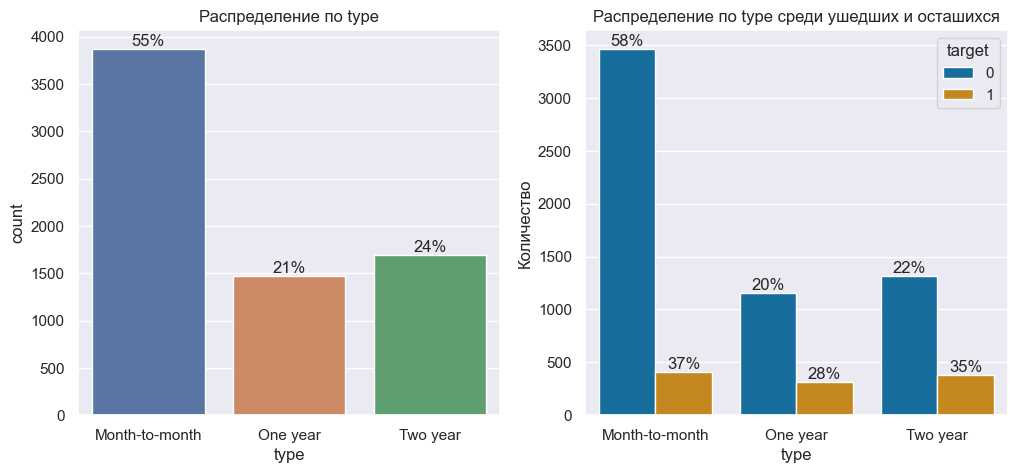

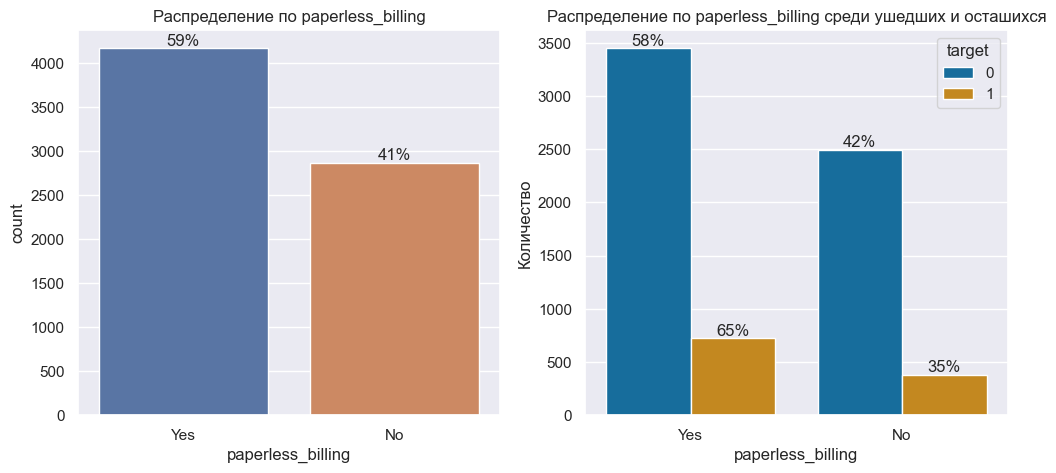

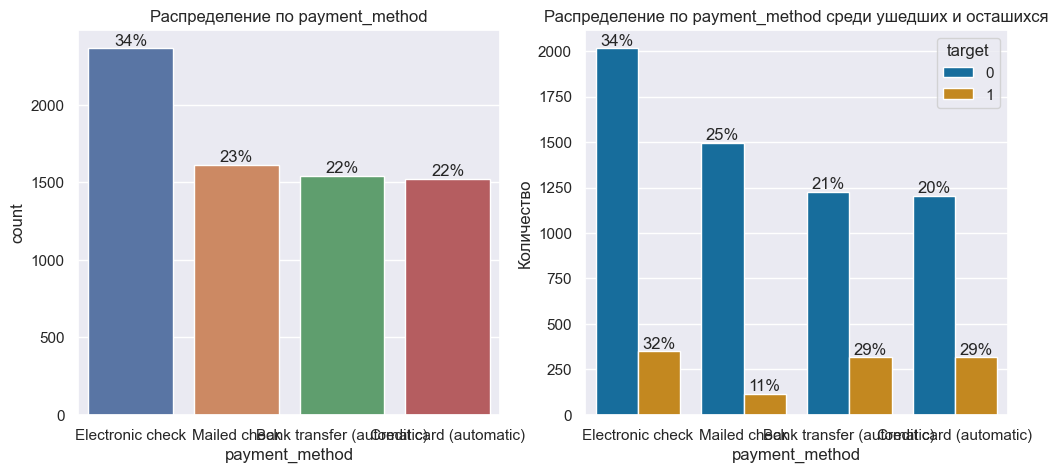

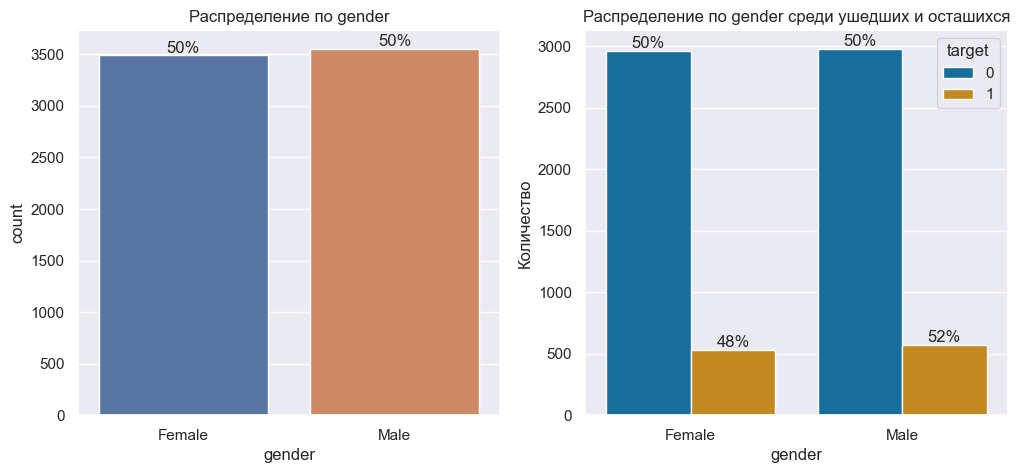

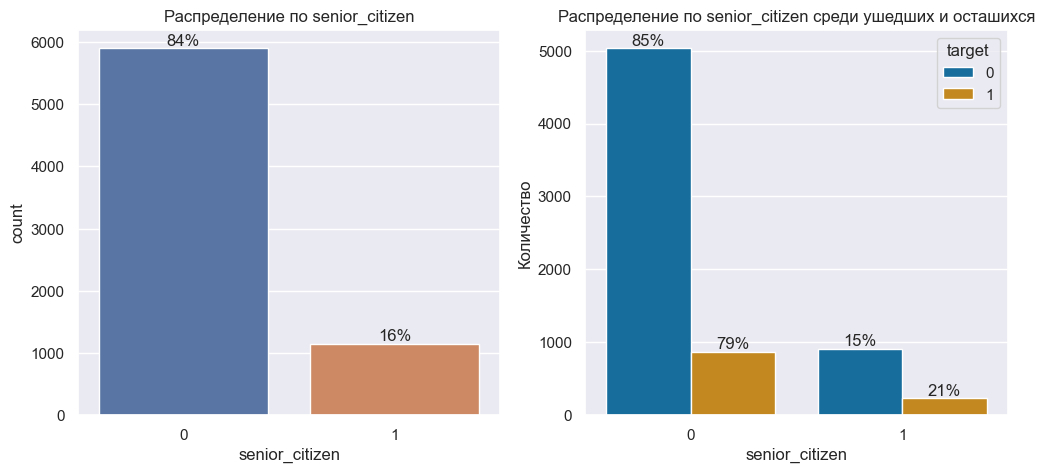

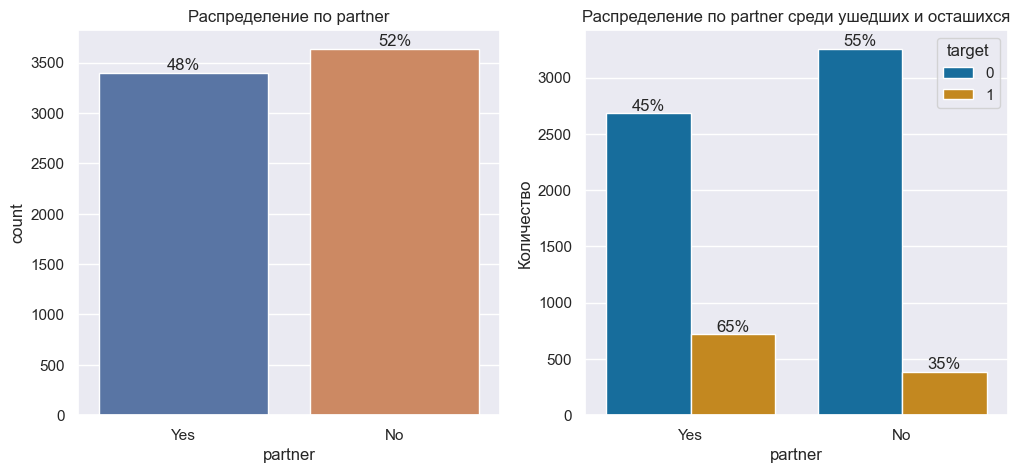

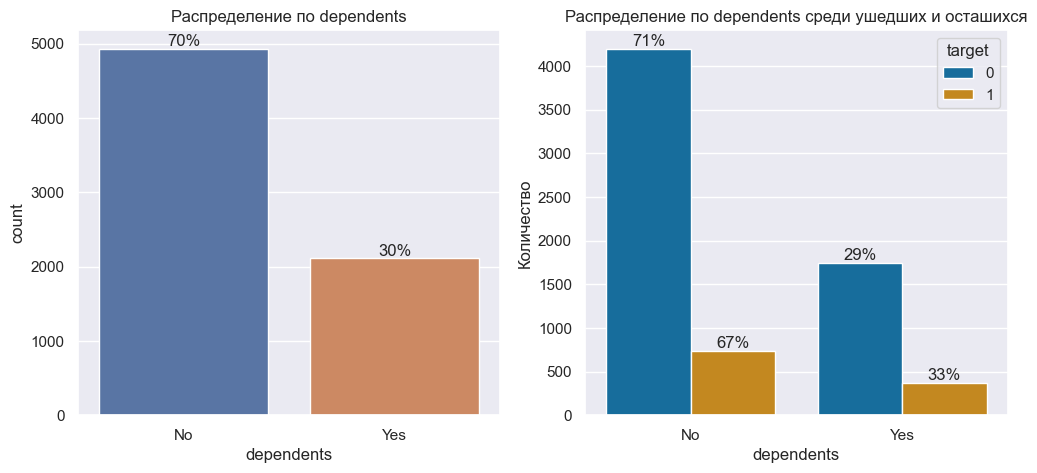

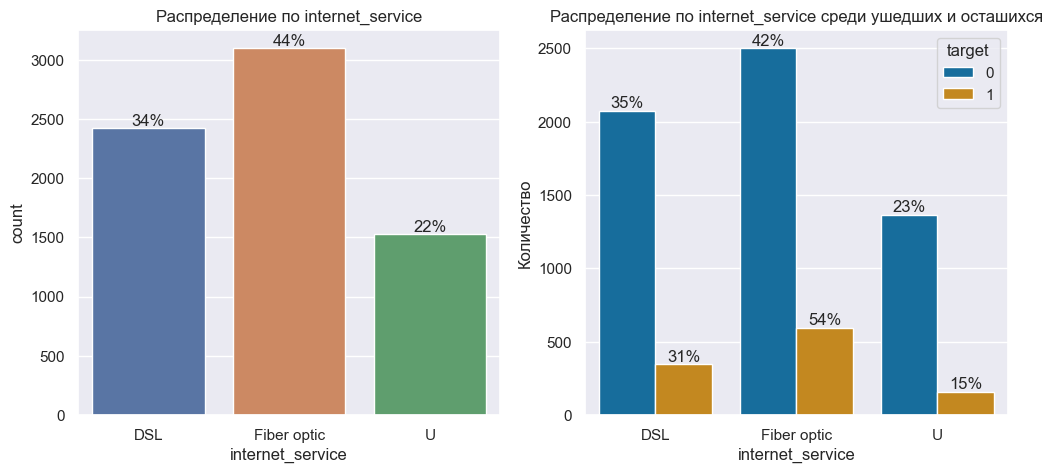

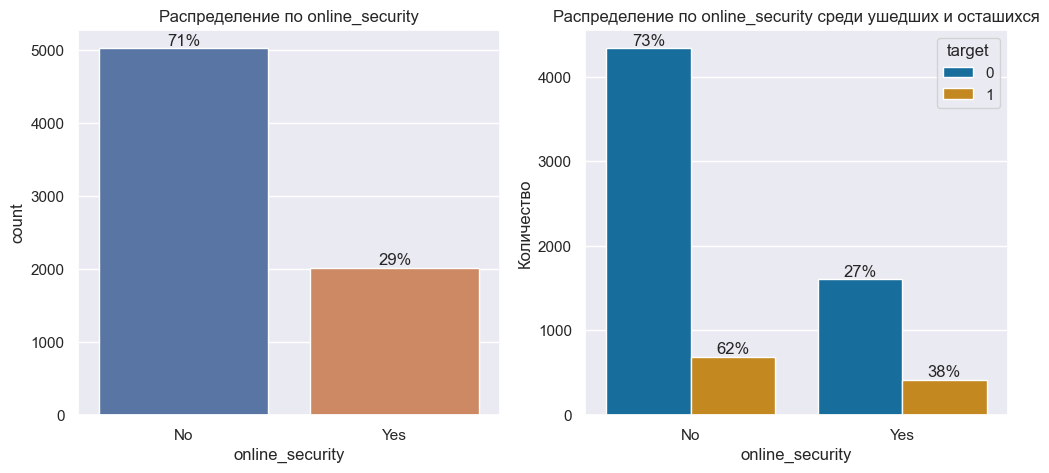

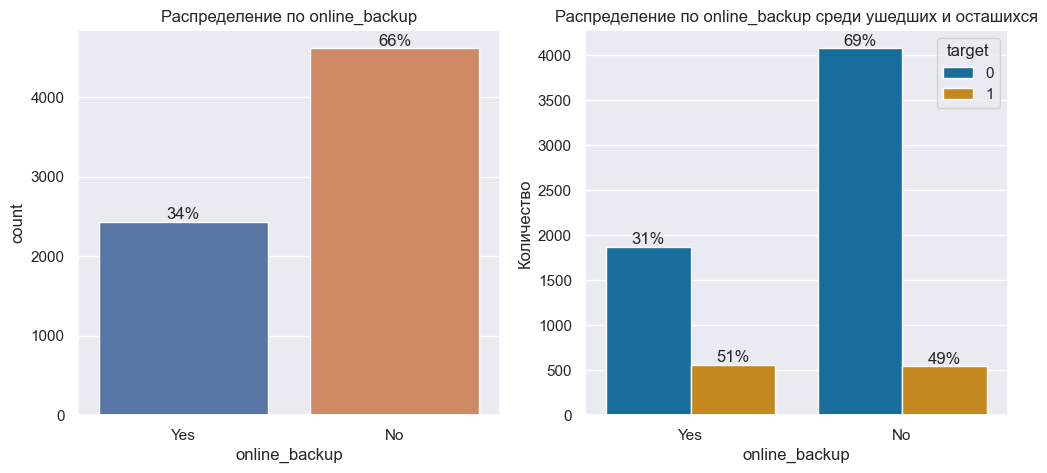

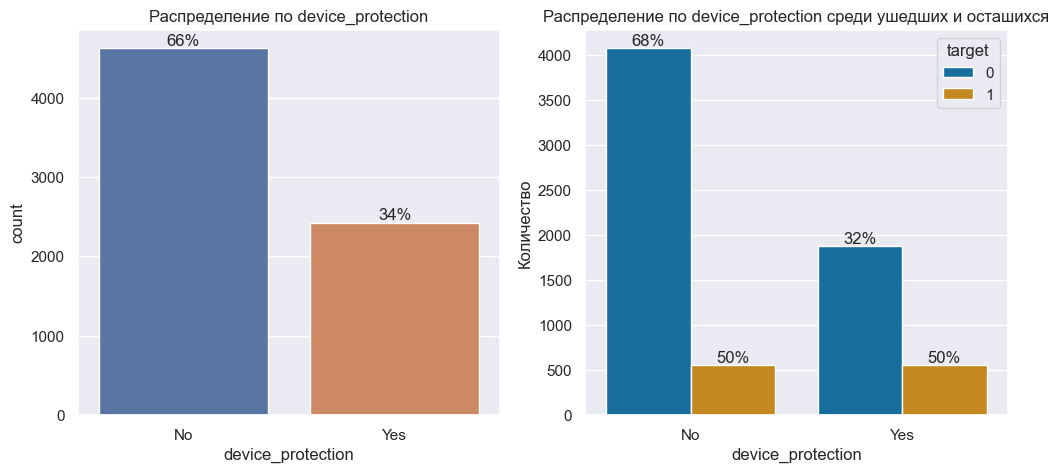

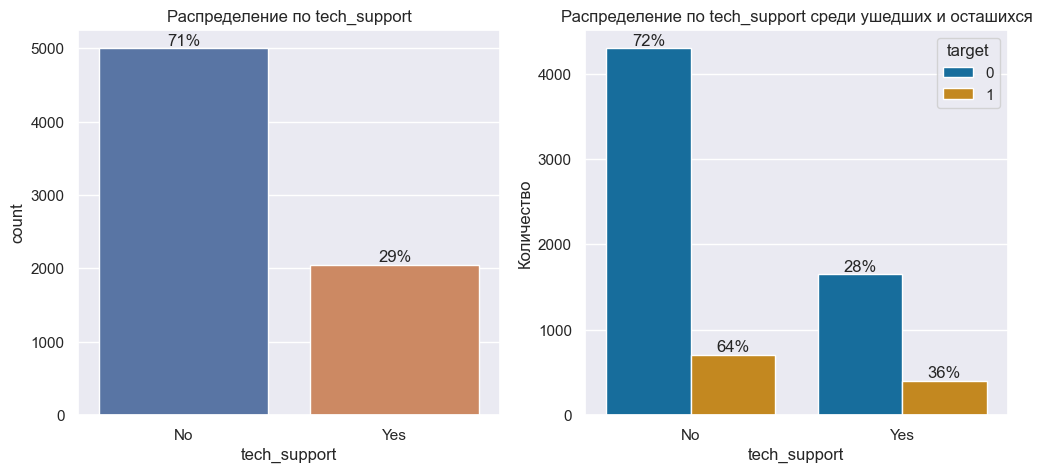

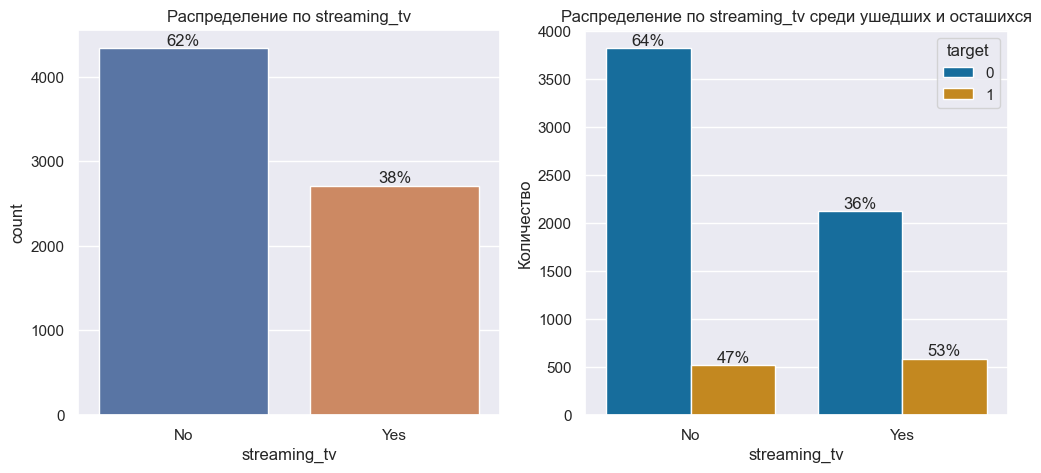

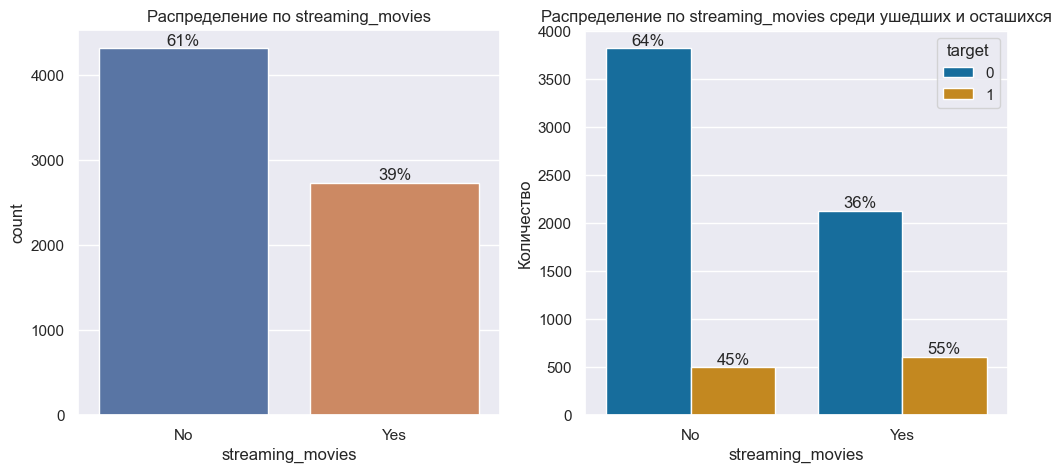

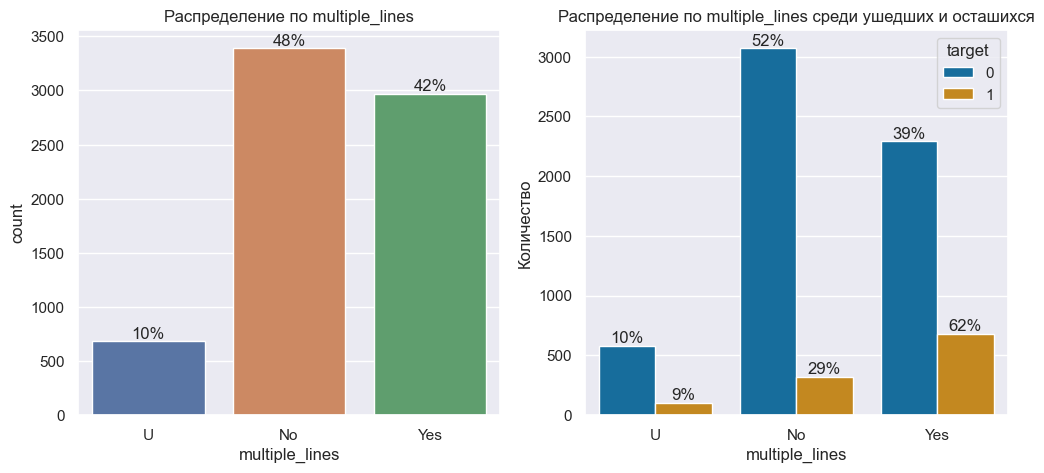

In [66]:
for c in categ_columns:
    feature_distribution(df, c,1)

<div class="alert alert-warning">
<h3> Комментарий тимлида (код) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> На мой взгляд, чтобы выявить отличительные черты, логичнее было бы противопоставлять ушедших клиентов оставшимся, а не всей массе данных, котороя тоже содержит ушедших.

<div class="alert alert-info">
<b>Комментарий:</b>
<br>
Левый график показывает популярность сервиса или технологии в принципе
</div>

<div class="alert alert-info">
<b>Доработка:</b>
<br>
В правый график добавлены лояльные клиенты
</div>

Среднее время жизни контракта

In [67]:
round(df['contract_lifetime'].mean()/365,2)

2.46

Среднее время жизни контракта для ушедшего абонента

In [68]:
round(df[df['target']==1]['contract_lifetime'].mean()/365,2)

2.53

#### Корреляция числовых признаков между собой

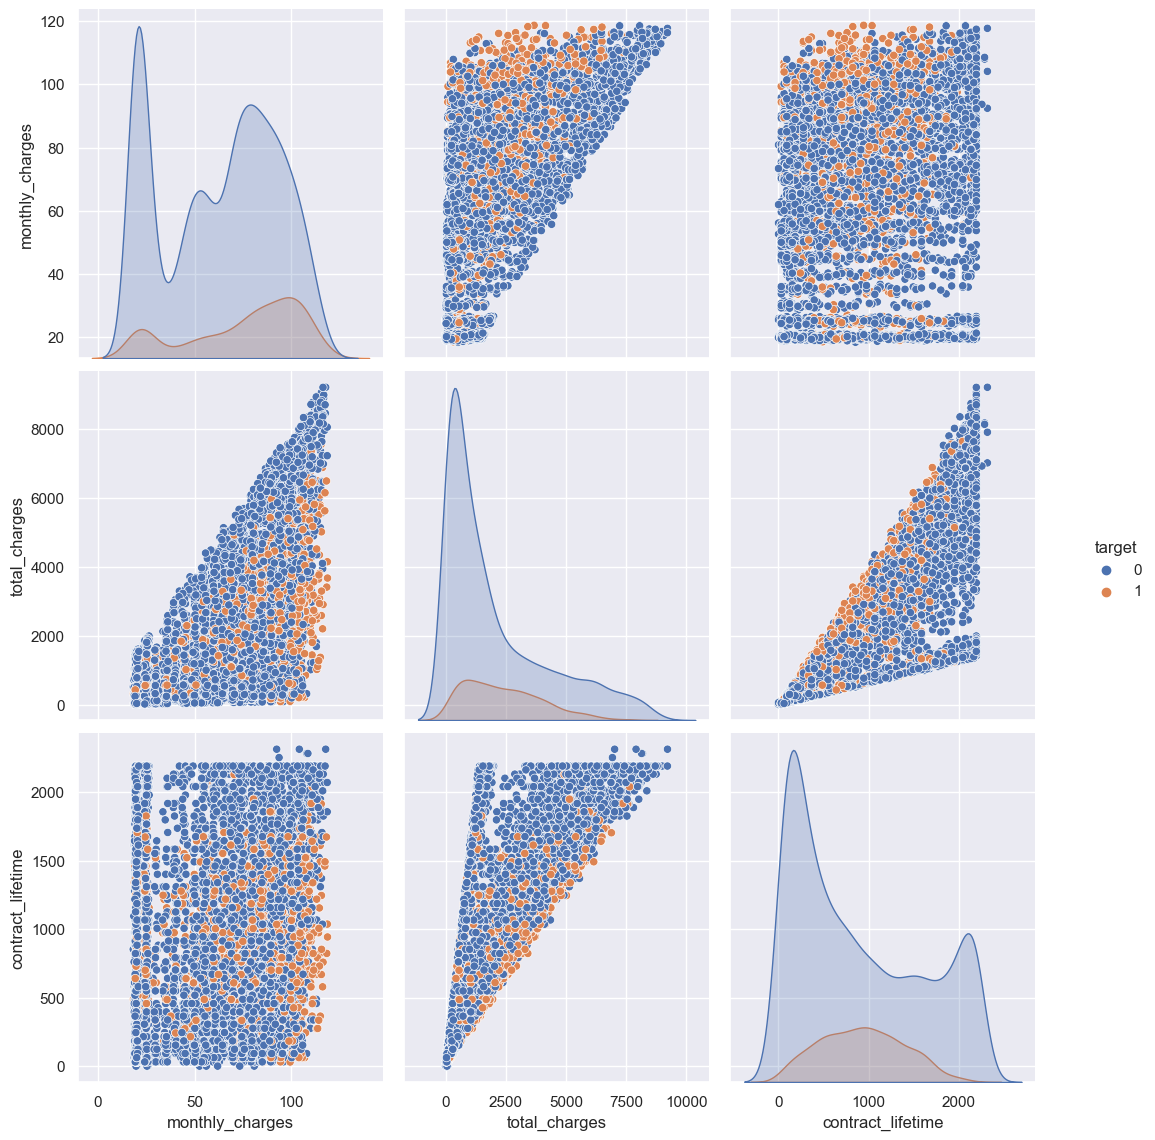

In [69]:
sns.pairplot(df[['monthly_charges','total_charges','contract_lifetime','target']], hue='target').fig.set_size_inches(12,12)

Чаще уходят те, кто в течение 2 - 3 лет получал высокие помесячные счета.<br>
График срока жизни договора имеет практически равномерное распределение. 

#### Анализ графиков

1. Больше абонентов с помесячной оплатой. Ушедшие абоненты равномерно распределены по типу оплаты
2. Большей части абонентов счет выставляется на электронную почту. Среди ушедших также преобладают те, кто получает счет на электр почту, но соотношение практически такое же
3. Способы платежа представлены примерно одинаково, с небольшим отрывом идет Bank transfer (~10%). **Меньше** всего покинули провайдера абоненты, имеющие оплату способом Mailed check, остальные одинаково распределены
4. Распределение по полу среди абонентов одинаковое. Среди ушедших распределение такое же
5. В подавляющем большинстве абоненты не являются пенсионерами. Среди ушедших такая же картина.
6. По семейному статусу абоненты распределены примерно одинаково. Но среди ушедших преобладают те, кто состоит в браке
7. Абонентов, не имеющих детей (иждевенцев), гораздо больше. Они же чаще завершают работу с провайдером
8. Количество абонентов, подключенных по DSL и Fiber optic отличается примерно на 10%. А вот среди ушедших Fiber optic пользовалось на 23% больше.
9. Среди интернет сервисов вопросы вызывают online_backup, servive_protection, streaming_tv, streaming_moves, так как пользующимися этими сервисами абонентов меньше или поровну, а процент ушедших преобладает. Видимо, качество услуг не соответствует ожиданиям.
10. На использование одно- и многоканальных линий заключено договоров примерно одинаково, а вот среди ушедших "многоканальные" договора сильно отрываются вперед (33%)

Исходя из вышеперечисленного, можно составить следующую картину:<br>
Ушедший абонент не является пенсионером, состоит в браке и не имеет иждевенцев, значит - это молодой человек.
То есть, это молодой человек, состоящий в браке и не имееющий иждевенцев, заключивший договор примерно 2,5 года назад на использование канала Fiber optic, многоканальной линии, с получением счетов на электронную почту, выполняющий платежи любым способом, отличным от mailed check, и недовольный работой online_backup, servive_protection, streaming_tv, streaming_moves сервисов.

Создается впечатление, что у провайдера проблемы с предоставлением качественных услуг

### Динамика заключенных и расторгнутых договоров по годам

In [70]:
df_year = df.copy()

In [71]:
df_year['y'] = pd.DatetimeIndex(df_year['begin_date']).year

In [72]:
ddd = pd.DataFrame(df_year['y'].value_counts()).reset_index()

In [73]:
df1_year = df.query('target == 1')

In [74]:
df1_year['end_date'] = pd.to_datetime(df1_year['end_date'])

In [75]:
df1_year['y'] = pd.DatetimeIndex(df1_year['end_date']).year

In [76]:
ddd1 = pd.DataFrame(df1_year['y'].value_counts()).reset_index()

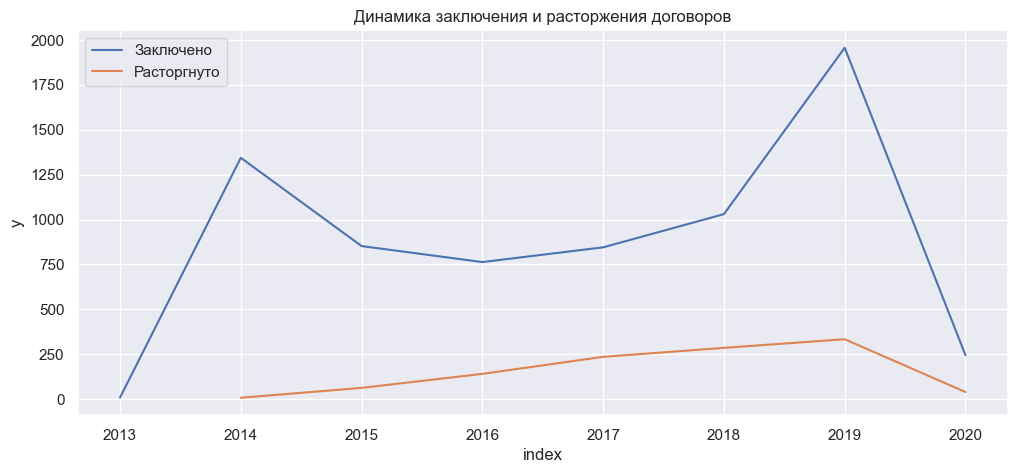

In [77]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(y="y",x='index',data=ddd,label='Заключено');
sns.lineplot(y="y",x='index',data=ddd1,label='Расторгнуто');
ax.set_title('Динамика заключения и расторжения договоров')
ax.legend();

получение сзначения месяца из даты заключения договора

In [78]:
df_year['m'] = pd.DatetimeIndex(df_year['begin_date']).month

In [79]:
d_is = df_year.pivot_table(index='y',values='begin_date',columns='m',aggfunc=['count'])

Распределение подключения к провайдеру по месяцам

In [80]:
d_is.head(10)

count                                                                 \
m        1      2      3      4      5      6      7      8      9      10   
y                                                                            
2013    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    3.0   
2014    7.0  366.0  178.0  114.0   98.0   97.0   98.0   82.0   72.0   80.0   
2015   75.0   80.0   58.0   69.0   74.0   79.0   61.0   66.0   67.0   81.0   
2016   57.0   73.0   61.0   73.0   68.0   59.0   58.0   67.0   74.0   65.0   
2017   64.0   55.0   94.0   66.0   66.0   62.0   65.0   71.0   73.0   57.0   
2018   73.0   91.0   89.0   81.0   65.0   84.0   80.0  100.0  100.0   78.0   
2019  114.0  128.0  110.0  108.0  123.0  141.0  156.0  146.0  237.0  237.0   
2020  233.0   11.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                    
m        11     12  
y                   
2013    2.0    3.0  
2014   77.0   75.0  
2015   74.0   68.0  
2016   50.0   58.0  
2017   82.0   90.0  
2018   99.0   90.0  
2019  237.0  220.0  
2020    NaN    NaN

In [81]:
for i in categ_columns:
    d_is = df_year.pivot_table(index='y',values='begin_date',columns=i,aggfunc=['count'])
    print(d_is)

              count                  
type Month-to-month One year Two year
y                                    
2013            NaN      1.0      7.0
2014          102.0    292.0    950.0
2015          232.0    327.0    293.0
2016          316.0    267.0    180.0
2017          496.0    250.0     99.0
2018          740.0    203.0     87.0
2019         1765.0    125.0     67.0
2020          224.0      8.0     12.0
                  count      
paperless_billing    No   Yes
y                            
2013                  2     6
2014                544   800
2015                337   515
2016                305   458
2017                350   495
2018                415   615
2019                772  1185
2020                147    97
                                   count                          \
payment_method Bank transfer (automatic) Credit card (automatic)   
y                                                                  
2013                                 4.0        

Имеется два пика на графике заключения договоров, соответствующих первому году наблюдений и с 2018 по 2019 год. За 2020 год наблюдений мало, по этой прчине его можно в расчет не включать. Между пиками имеется небольшой спад и линейное возрастание. Серьезных провалов не наблюдается. Спады можно объяснить тем фактом, что абоненты, сильно желающие пользоваться услугами провайдера (интернетом) массово подключились в первый год.<br>
Из сводной таблицы видно, что на протяжении всего 2019 года в два раза больше заключено договоров в каждом месяце, чем за тото же предыдущего года. А с сентября показатели еще выросли. Значения всех признаков возросли примерно одинаково, то есть из имеющихся данных нельзя сделать вывод, что какой-то конкретный признак сильно повлиял на массовое подключение в 2019 году. Возможно, кто-то знал про COVID.
График расторжения договоров линейно растет с 2014 года. Без колебаний. Массового бегства абонентов из компании не наблюдается ни в один из годов наблюдения.


<div class="alert alert-warning">
<h3> Комментарий тимлида (код) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* Дополнительно, чтобы как-то соотнести между собой приток и отток, было бы также интересно посмотреть на динамику оттока и притока клиента относительно действующих клиентов и на динамику самих действующих клиентов в тот или иной момет времени.
    
    
* Для расчета годовых или ежемесячных показателей удобнее было бы использовать groupby или resample, <a href = 'https://pbpython.com/pandas-grouper-agg.html'>пример</a>.

<div class="alert alert-info">
<b>Комментарий:</b>
    Не совсем понял, какая динамика требуется
<br>

### Вывод

Составлен портрет пользователя:<br>
Ушедший абонент не является пенсионером, состоит в браке и не имеет иждевенцев, значит - это молодой человек.
То есть, это молодой человек, состоящий в браке и не имееющий иждевенцев, заключивший договор примерно 2,5 года назад на использование канала Fiber optic, многоканальной линии, с получением счетов на электронную почту, выполняющий платежи любым способом, отличным от mailed check, и недовольный работой online_backup, servive_protection, streaming_tv, streaming_moves сервисов.<br>

В динамике заключения договоров из имеющихся признаков не выявлено тех, которые прямо влияют на количество заключаемых или расторгаемых договоров. Пики наблюдаются в начале наблюдений и в 2019 году. График расторжения договоров не имеет колебаний, монотонно возрастает с низким градиентом (наклоном). Данные за 2020 год н а графике можно не учитывать в связи недостаточностью данных


## Исследование мультиколлинеарности

### Матрица и график мультиколлинеарности

ПОстроение матрицы корреляции и графика будет выполняться средствами модуля **phik**

Из данных, на основе которых будет выполняться проверка мультиколлинеарности и дальнейшая работа с моделями исключаются **'customer_id','begin_date','end_date'**

In [82]:
df_for_corr = df.drop(['customer_id','begin_date','end_date'],axis=1)

In [83]:
int_col = ['monthly_charges', 'total_charges', 'contract_lifetime']

In [84]:
phik_overview = df_for_corr.phik_matrix(interval_cols=int_col)
#phik_overview

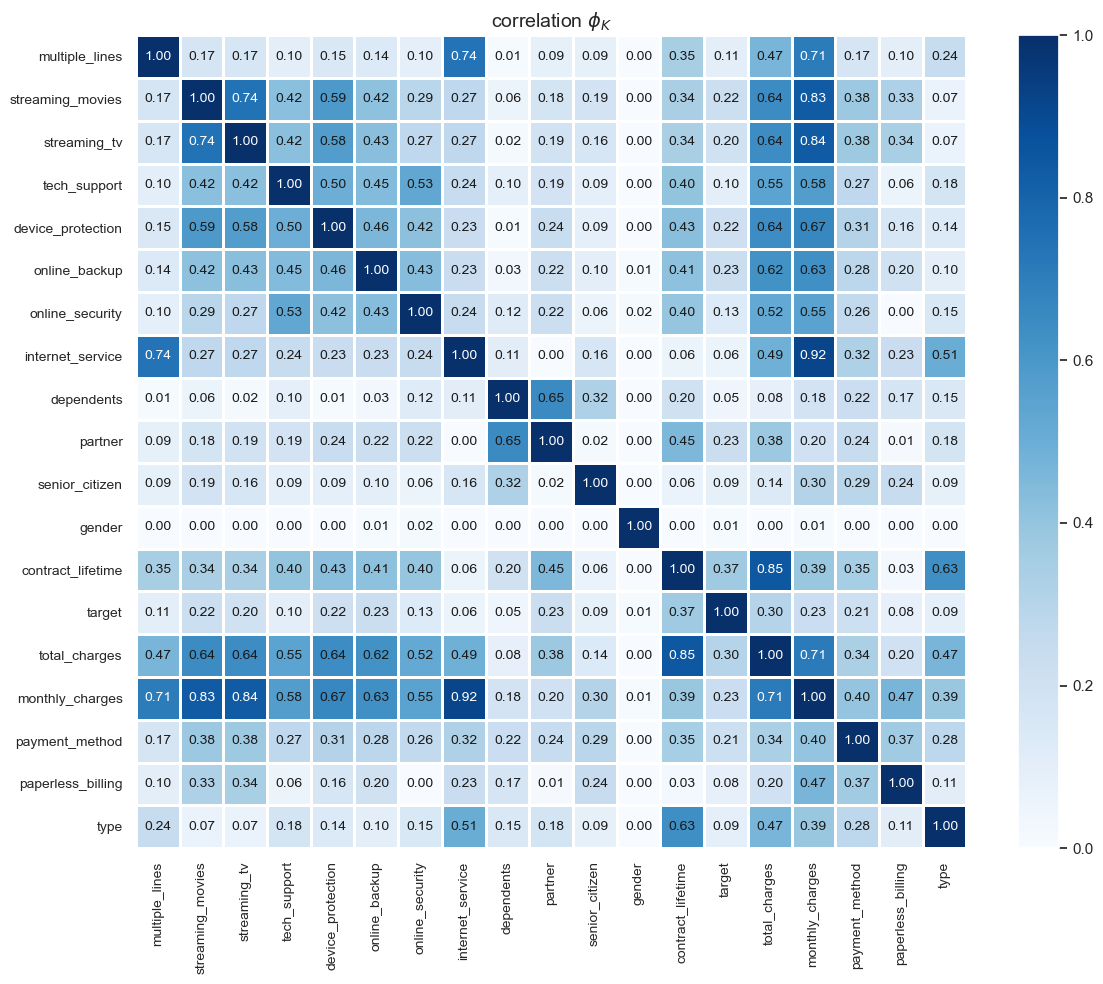

In [85]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(12,10))
plt.tight_layout()

В среднем сильнне всех коррелирует со многоми признаками **'monthly_charges'**. Необходимо выполнить исключение его из признаков.

In [86]:
df_for_corr = df_for_corr.drop(['monthly_charges'],axis=1)

In [87]:
phik_overview = df_for_corr.phik_matrix(interval_cols=int_col)
#phik_overview

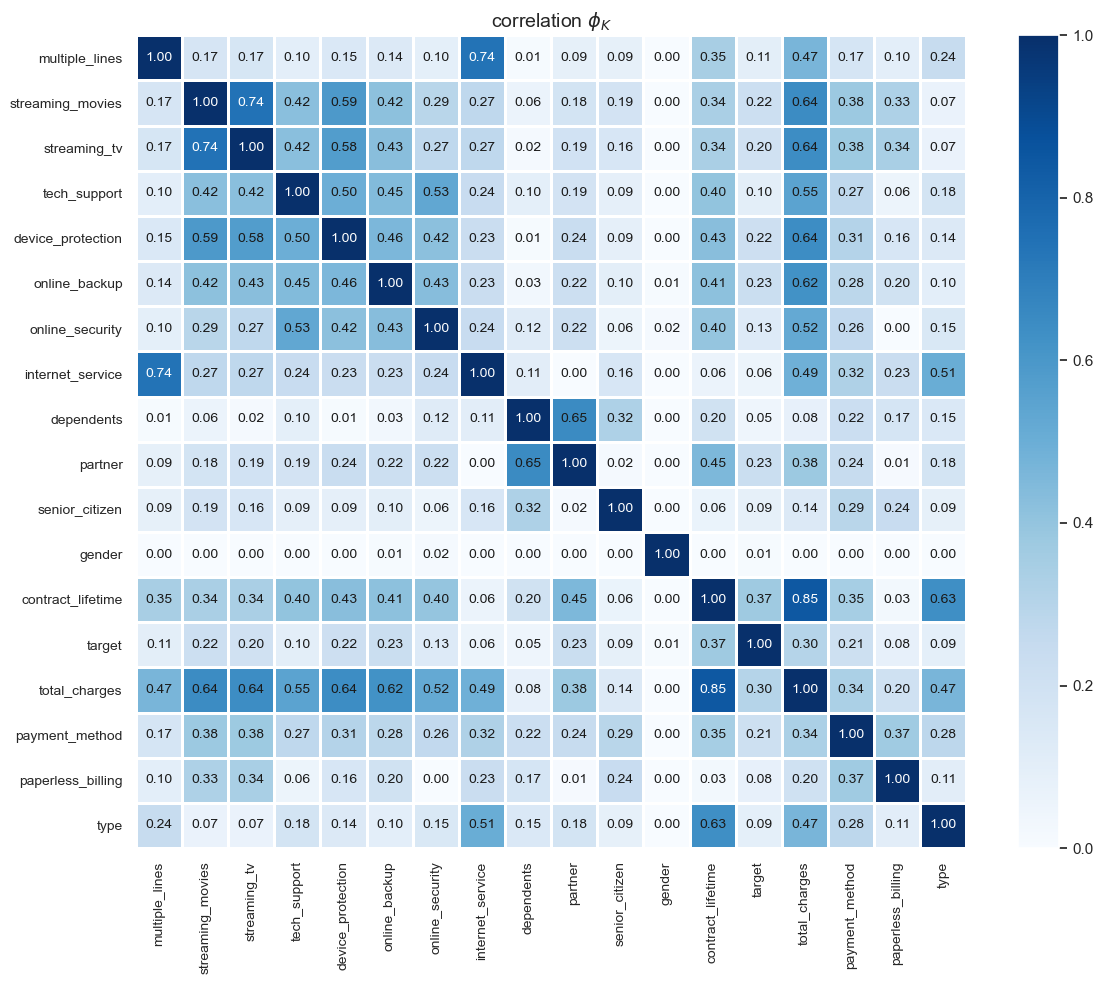

In [88]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(12,10))
plt.tight_layout()

Все признаки **очень слабо** коррелируют с целевым признаком

In [89]:
df_full = df_for_corr

### Вывод

Признаки 'customer_id','begin_date','end_date' исключены из дальней работы с моделями<br>
Была вывявлена корреляция признака **month_charges** со многими признаками, по этой причине он был удален из дальнейшего участия в работе.<br>
Умеренной или сильной корреляции с целевым признаком не выявлено ни у одного из признаков

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
  
* Чтобы фик не угадывал, какие из наших признаков числовые, было бы лучше явно прописать их через параметр interval_cols, причем исключив из них категориальные признаки, который по своей сути не могут быть интервальными.
    
    
* С учетом того, что значения корреляции отображены на тепловой карте, матрицы можно не печатать, чтобы не нагружать работу.
    
    
* В целом все верно, присутствие мультиколлинеарности, во-первых, может искажать оценку важности скоррелированных признаков (при некторых подходах, например, при использовании permutation importance, достаточно сильно), во-вторых, будет излишне нагружать модель рсчетами, приносящими мало дополнительной пользы.
    
    При этом удаление целых признаков - не единственный способ борьбы с мультиколлинеарностью. Категориальные признаки можно дробить на отдельные категории и удалять только те, которые вносят корреляцию. Для числовых признаков можно использовать PCA  или самостоятельно создать какую-то линейную комбинацию из скоррелированных признаков. Также существует еще вариант использовать линейные модели с регуляризацией: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>LogisticRegression</a> из sklearn согласно дефолтным настройкам использует L2 регуляризацию, которая способна бороться с проблемой мультиколлинеарности.

## Разделение на выборки

### Кодирование

<div class="alert alert-block alert-danger">
<h3> Комментарий тимлида (код) <a class="tocSkip"></h3>

<b>На доработку🤔:</b> Производить кодировование до разделения на выборки не совсем профессионально, таким образом мы производим предобработку с подглядыванием в тестовую выборку (в будущее), в которой вполне возможно может оказаться какая-то редкая категория, из-за которой придется создать дополнительную бинарную переменную и в трейне в том числе (в котором она была бы представлена константным признаком, от которых обычно избавляются, как от ненесущих информации, и на тесте это все равно бы ничего полезного не дало), но этого бы не произошло при альтернативном сценарии с кодированием после разбиения.
    
    
При этом если применить get_dummies после разбиения отдельно для трейна и для теста, то после этого обязательно должен идти шаг с проверкой идентичности получившихся наборов признаков и их порядка (модели часто не следят за названиями, поэтому эту ошибку применения на отличающеймя выборке очень просто упустить). Чтобы облегчить себе задачу и при этом не допускать подглядываний, лучше использовать <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OHE</a> от sklearn, который по аналогии со всеми другими методами этого пакета способен сначала "обучаться" (fit) на предоставленных ему данных (на трейне, чтобы без подглядываний), а затем уже по определенным параметрам трансформировать (transform) ту или иную выборку. Этот метод тебе пригодится, если ты захочишь во избежание утечек еще и в процессе кросс-валидации производить предобработку данных в <a href = 'https://scikit-learn.ru/6-1-pipelines-and-composite-estimators/'>пайплайне</a> (дополнительно для возможности применения в пайплайне того или иного метода к конкретному набору призанков тебе понадобиться <a href = 'https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html'>ColumnTransformer</a>, обращаем внимание на параметр remainder). 
    
Подробнее с особенностями и различием get_dummies и OHE можно ознакомиться в этом <a href = 'https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing'>ноутбуке</a>.

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Если не ограничивать количество выводимой информации, то вывод ограничится только при отображении, но в json (в виде которых хранятся jupyter ноутбуки) на диске будут все данные (все 7 тыс строк, которые сейчас переведены в столбцы), что может тормозить открытие и работу тетрадки. Чтобы такого не происходило, следует ограничивать вывод несколькими строками: head, tail, sample.

<div class="alert alert-info">
<b>Доработка:</b>
<br>
Вывод всего датафрейма - это случайность
</div>

### Разбиение а выборки

Данные разбиваются в отношении 3:1

In [90]:
object_columns = df_full.select_dtypes(include=['object']).columns

In [91]:
object_columns

Index(['type', 'paperless_billing', 'payment_method', 'gender', 'partner',
       'dependents', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines'],
      dtype='object')

In [92]:
enc = OneHotEncoder(drop = 'first',sparse = False)

In [93]:
def col_trans(df,cols,f='f_t'):
    if f == 'f_t':
        enc_df = pd.DataFrame(enc.fit_transform(df[cols]))
    else:
        enc_df = pd.DataFrame(enc.transform(df[cols]))
    enc_df.columns = enc.get_feature_names_out()
    df = df.drop(cols,axis=1)
    df.reset_index(drop= True , inplace= True )
    df = df.join(enc_df)
    return df

In [158]:
def make_select_data(df_full):
    df_train, df_test = train_test_split(df_full, test_size=0.25, random_state=RANDOM)
    X1_train = df_train.drop(['target'], axis=1)
    y_train = df_train['target']
    X1_test = df_test.drop(['target'], axis=1)
    y_test = df_test['target']
    
    X1_train = col_trans(X1_train,object_columns,f='f_t')
    X1_test = col_trans(X1_test,object_columns,f='t')
    X1 = col_trans(df_full.drop('target', axis=1),object_columns,f='t')
    y = df_full['target']
    
    numeric_columns = ['total_charges', 'contract_lifetime']
    scaler = StandardScaler()
    scaler.fit(X1_train[numeric_columns])

    X1_train[numeric_columns] = scaler.transform(X1_train[numeric_columns])
    X1_test[numeric_columns] = scaler.transform(X1_test[numeric_columns])
    X1[numeric_columns] = scaler.transform(X1[numeric_columns])
    return X1_train,y_train,X1_test, y_test,X1,y

In [159]:
X1_train,y_train,X1_test, y_test,X1,y = make_select_data(df_full)

df_train, df_test = train_test_split(df_full, test_size=0.25, random_state=RANDOM)

X1_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
X1_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

X1_train.shape

X1_test.shape

### OneHotEncoder

enc = OneHotEncoder(drop = 'first',sparse = False)

def col_trans(df,cols,f='f_t'):
    if f == 'f_t':
        enc_df = pd.DataFrame(enc.fit_transform(df[cols]))
    else:
        enc_df = pd.DataFrame(enc.transform(df[cols]))
    enc_df.columns = enc.get_feature_names_out()
    df = df.drop(cols,axis=1)
    df.reset_index(drop= True , inplace= True )
    df = df.join(enc_df)
    return df

X1_train = col_trans(X1_train,object_columns,f='f_t')

X1_test = col_trans(X1_test,object_columns,f='t')

**Данные для cross_val_predict**

X1 = col_trans(df_full.drop('target', axis=1),object_columns,f='t')

y1 = df_full['target']

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Зачем шаг с кодированием выполнен два раза?

<div class="alert alert-info">
<b>Комментарий:</b>
<br>
Видимо, копировал туда-сюда. Не заметил
</div>

### Масштабирование признаков

numeric_columns = ['total_charges', 'contract_lifetime']
scaler = StandardScaler()
scaler.fit(X1_train[numeric_columns])

X1_train[numeric_columns] = scaler.transform(X1_train[numeric_columns])
#X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X1_test[numeric_columns] = scaler.transform(X1_test[numeric_columns])
X1[numeric_columns] = scaler.transform(X1[numeric_columns])

<div class="alert alert-warning">
<h3> Комментарий тимлида (код) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Сейчас ты скалируешь тренировочную выборку без подглядывание в тестовую, и это абсолютно верно, таким образом мы не допускаем утечки информации. Но при совмещении стандартизации (и любой другой предобработки, зависящей от всего объема данных) и кросс-валидации точно так же важно не допускать утечки с валидационных выборок на подтренировочные. 
    
<details> <summary> <span style='color:green' > Развернуть подробнее. </span> </summary>
Если мы сначала стандартизируем всю тренировочную выборку и потом делим на подтренировочную и валидационную, то получается, что подтренировочная выборка отскалирована с учетом особенностей валидационной, поэтому модель заранее обучается этим особенностям и потом показывает хорошие результаты на валидации. То есть мы получаем неоправданное смещение метрики качества в лучшую сторону. Причем чем больше отличались друг от друга неотскалированные подвыборки, тем сильнее будет смещение. Решение, принятое по смещенным оценкам, не будет обладать достаточной степенью надежности. 
    
Мы не хотим допустить утечки, поэтому важно стандартизировать каждую валидационную выборку с учетом параметров текущей тренировочной. Технически это можно реализовать с помощью <a href = 'https://scikit-learn.ru/6-1-pipelines-and-composite-estimators/'>пайплайнов</a> (помощник для создания последовательности выполнения методов, через которые сначала проходит тренировочная выборка, обучая их, а затем тестовая/валидационная, примеряя обученные методы на себя), например так:

```python
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', ml_model)])
cross_val_score(pipeline, X_train, y_train)
```
Аналогично и для тюнеров (GridSearchCV, RandomizedSearchCV), но потребуется называть параметры для перебора определенным образом, указывая метод, к которому они относятся, пример <a href = 'https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html'>тут</a>. Пайплайны при этом даже позволяют подбирать параметры для методов предобработки (если в этом есть необходимость). Если нужно применить метод только к определенным признакам, аналогично дополнительно оборачиваем StandardScaler() в обертку из ColumnTransformer, о котором уже говорила выше.
    
</details>

### Отбор признаков

Для отбора признаков, используемых в дальнейшем для обучения моделей будет использоваться модель екурсивного исключения признаков (RFE)

In [160]:
n_feat = 15

In [161]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select = n_feat)
X_train_new = rfe.fit_transform(X1_train, y_train)
print('\n\nОтбор методом случайных деревьев (Random Forest)\n', X_train_new)



Отбор методом случайных деревьев (Random Forest)
 [[ 1.78574711  1.76439515  0.         ...  0.          0.
   1.        ]
 [ 2.34226859  1.49514854  0.         ...  1.          1.
   0.        ]
 [-0.54078718  0.2015942   0.         ...  0.          0.
   1.        ]
 ...
 [-0.69581969 -0.90758475  0.         ...  0.          0.
   0.        ]
 [ 1.26771616  1.54051074  0.         ...  1.          1.
   0.        ]
 [-0.72268362 -0.82271353  1.         ...  1.          1.
   0.        ]]


In [162]:
X_test_new = rfe.transform(X1_test)

In [163]:
#X_val = rfe.transform(X_val)

In [164]:
X_new = rfe.transform(X1)

In [165]:
X_train_new.shape

(5282, 15)

In [166]:
X_test_new.shape

(1761, 15)

In [167]:
#X_val.shape

In [168]:
X_new.shape

(7043, 15)

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 5 признаков, на мой взгляд, достаточно жесткий метод отбора. При этом в процессе отбора признаков рекомендуется держать руку на пульсе и следить за качестом модели, чтобы сильно в нем не потерять. Именно поэтому сходу так много признаков как правило не удаляют, а принимают такие решения уже индивидуально для лучшей модели на основании именно ее представлений о важности каждого признака.

**Названия отобранных признаков**

In [169]:
select_feature = rfe.get_feature_names_out()

In [170]:
select_feature

array(['total_charges', 'contract_lifetime', 'type_One year',
       'type_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)', 'gender_Male',
       'partner_Yes', 'dependents_Yes', 'online_security_Yes',
       'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes',
       'streaming_movies_Yes', 'multiple_lines_Yes'], dtype=object)

## Обучение моделей

In [171]:
X_train = X_train_new

In [172]:
X_test = X_test_new

In [173]:
X = X_new

In [174]:
def model_learning(model, parameters):
    dir_params = model.get_params()
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=RANDOM)
    grid_model = GridSearchCV(model, parameters, scoring='roc_auc', refit=True,cv=cv)
    grid_model.fit(X_train, y_train)
    print('Лучшая оценка на валидации: ', grid_model.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid_model.best_params_)
    print('Лучшая модель: ', grid_model.best_estimator_)
    
    return grid_model

Тестирование модели на тестовой выборке

In [175]:
def test_scoring(model,model_name,roc_curve_dict):
    '''
    Тестирование модели на тестовой выборке
    '''
    
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)
    #print('Accuracy: ', round(model.score(X_test, y_test), 3))
    #print('Presicion: ', round(precision_score(y_test, pred_test), 3))
    #print('Recall: ', round(recall_score(y_test, pred_test), 3))
    #print('AUC-ROC: ', round(roc_auc_score(y_test, pred_proba_test), 3))
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test)
    gmeans = sqrt(tpr * (1-fpr))
    ix = argmax(gmeans)
    roc_curve_dict[model_name] = [fpr, tpr, thresholds,thresholds[ix]]
    """
    sns.set()
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()
    """

In [176]:
def plot_all_roc(roc_curve_dict):
    '''
    Построение графиков ROC-AUC на одном
    '''
    sns.set()
    plt.figure(figsize=(8, 5))
    leg = []
    for k,v in roc_curve_dict.items():
        leg.append(k)
        #gmeans = sqrt(v[0] * (1-v[1]))
        #ix = argmax(gmeans)
        plt.plot(v[0], v[1])
        #plt.scatter(v[0][ix], v[1][ix], marker='o', color='black')
        #print(k, v[2][ix])
    #fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test)
    #roc_curve_dict[model_name] = [fpr, tpr, thresholds]
    
    #plt.figure(figsize=(8, 5))
    #plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(leg)

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()

In [177]:
def opt_thr(fpr,tpr,thresholds):
    '''
    Определение порога TPR-FPR
    '''
    
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh

Вывод графика распределения важности признаков

In [178]:
def feature_importance(importances, space=.01):
    '''
    Вывод графика распределения важности признаков
    '''
   
    indices = np.argsort(importances)
    #print(indices)
    fig, ax = plt.subplots()
    plt.xticks(rotation=0)
   
    ax.barh(range(len(importances)), importances[indices])
    ax.set_yticks(range(len(importances)))
    _ = ax.set_yticklabels(select_feature[indices])
    for p in ax.patches :
        _x = p. get_x() + p. get_width() + float(space)
        _y = p. get_y () + p. get_height () - (p. get_height ()*0.5) 
        value = '{:.1f} '. format (p. get_width ())
        ax.text (_x, _y, value, ha='right')
    
    lf = {}
    for i in indices[::-1][0:n_feat]:
        #lf.append(select_feature[i])   
        lf[select_feature[i]] = importances[i]
    return lf

Подбор порога

In [179]:
# если вероятность выше порога, то значение 1
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [180]:
def tuning_threhold(model):
    '''
    Функция подбора оптимального порога по F1-мере
    '''
    
    yhat = model.predict_proba(X_test)
    # извлечение вероятностей
    probs = yhat[:, 1]
    # определение массива со значенями порога
    thresholds = arange(0, 1, 0.001)
    # расчет f1 - меры для каждого порога
    scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
    # индекс значения порога с максимальной f1 мерой
    ix = argmax(scores)
    print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    return thresholds[ix], scores[ix]

In [181]:
def app_data_model_param(df,list_param):
    '''
    Запись результатов в таблицу
    '''
    
    df.loc[-1] = list_param
    df.index = df.index + 1
    df = df.sort_index()

Таблица для сбора данных полученных результатов

In [182]:
model_param = pd.DataFrame(columns=['model','roc_auc_train','pointer','cross_val_predict', 'time'])

In [183]:
model_param

,model,roc_auc_train,pointer,cross_val_predict,time


In [184]:
roc_curve_dict={}

### LogisticRegression

In [185]:
name_model = 'LogisticRegression'

In [186]:
model = LogisticRegression(random_state=RANDOM, n_jobs=-1)

In [187]:
param_grid = {'C' : np.linspace(0.001, 10, 20)}

In [188]:
%%time

model = model_learning(model,param_grid)    


Лучшая оценка на валидации:  0.7567552993960523
Лучшие гиперпараметры модели на валидации:  {'C': 0.5272631578947369}
Лучшая модель:  LogisticRegression(C=0.5272631578947369, n_jobs=-1, random_state=190623)
CPU times: total: 609 ms
Wall time: 1.28 s


**Вычисление cross_val_score**

In [189]:
pr = cross_val_predict(model.best_estimator_, X, y, cv=5,method='predict_proba')
roc_auc_cross = round(roc_auc_score(y, pr[:,1]), 3)

In [190]:
test_scoring(model.best_estimator_,name_model,roc_curve_dict)

<div class="alert alert-warning">
<h3> Комментарий тимлида (код) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Для линейных моделей важность признака можно смотреть по коэффициенту перед ним (но данные должны быть отмасштабированы).

In [191]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      roc_auc_cross,
                      model.refit_time_
                     ]
                    )

### RandomForestClassifier

In [192]:
name_model = 'RandomForestClassifier'

In [193]:
model = RandomForestClassifier(random_state=RANDOM, n_jobs=-1)

In [194]:
param_grid = {'n_estimators': [300, 500, 1000],
            'max_depth': [1, 5, 9],
            'min_samples_leaf': np.arange(1, 6, 2),
            'min_samples_split': np.arange(2, 7, 2)
             }

In [195]:
%%time
model = model_learning(model,param_grid)    

Лучшая оценка на валидации:  0.8171148846017163
Лучшие гиперпараметры модели на валидации:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
Лучшая модель:  RandomForestClassifier(max_depth=9, min_samples_split=4, n_estimators=1000,
                       n_jobs=-1, random_state=190623)
CPU times: total: 4min 3s
Wall time: 4min 8s


**Вычисление cross_val_predict**

In [196]:
pr = cross_val_predict(model.best_estimator_, X, y, cv=5,method='predict_proba')
roc_auc_cross = round(roc_auc_score(y, pr[:,1]), 3)

In [197]:
test_scoring(model.best_estimator_,name_model,roc_curve_dict)

In [198]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      roc_auc_cross,
                      model.refit_time_
                     ]
                    )

### LGBM

In [199]:
name_model = 'LGBMClassifier'

In [200]:
model = LGBMClassifier(random_state=RANDOM, min_child_samples = 10)

In [201]:
param_grid = {'n_estimators':  [250, 300,350],
                  'learning_rate': [0.01, 0.1, 0.5],
                  'max_depth': [1, 5, 9],
                  'class_weight':[None,'balanced']
             }

In [202]:
%%time
model = model_learning(model,param_grid)    

Лучшая оценка на валидации:  0.8892079202161268
Лучшие гиперпараметры модели на валидации:  {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350}
Лучшая модель:  LGBMClassifier(max_depth=5, min_child_samples=10, n_estimators=350,
               random_state=190623)
CPU times: total: 4min 12s
Wall time: 33.9 s


**Вычисление cross_val_predict**

In [203]:
pr = cross_val_predict(model.best_estimator_, X, y, cv=5,method='predict_proba')
roc_auc_cross = round(roc_auc_score(y, pr[:,1]), 3)

In [204]:
test_scoring(model.best_estimator_,name_model,roc_curve_dict)

In [205]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      roc_auc_cross,
                      model.refit_time_
                     ]
                    )

### XGBClassifier

In [206]:
name_model = 'XGBClassifier'

In [207]:
model = XGBClassifier(n_jobs=-1, verbosity=0, random_state=RANDOM)

In [208]:
param_grid = {'max_depth': [4, 6, 8, 9, 12],
              'learning_rate': [0.05, 0.1, 0.5, 1],
              'iterations': [50, 100]}

In [209]:
%%time
model = model_learning(model,param_grid)    

Лучшая оценка на валидации:  0.893387403083616
Лучшие гиперпараметры модели на валидации:  {'iterations': 50, 'learning_rate': 0.5, 'max_depth': 4}
Лучшая модель:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, iterations=50, learning_rate=0.5,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, ...)
CPU times: total: 5min 22s
Wall time: 43.3 s


**Вычисление cross_val_predict**

In [210]:
pr = cross_val_predict(model.best_estimator_, X, y, cv=5,method='predict_proba')
roc_auc_cross = round(roc_auc_score(y, pr[:,1]), 3)

In [211]:
test_scoring(model.best_estimator_,name_model,roc_curve_dict)

In [212]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      roc_auc_cross,
                      model.refit_time_
                     ]
                    )

### CatBoostClassifier

<div class="alert alert-warning">
<h3> Комментарий тимлида (код) <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Regressor?

<div class="alert alert-info">
<b>Доработка:</b>
<br>
ОЙ!
Опечатался )
</div>

In [213]:
name_model = 'CatBoostClassifier'

In [214]:
model = CatBoostClassifier(random_state=RANDOM,verbose = False)

In [215]:
param_grid = {   'n_estimators': [300, 500, 1000],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [1, 5, 9],
                      'l2_leaf_reg': [1, 3]
             }

In [216]:
%%time
model = model_learning(model,param_grid)    

Лучшая оценка на валидации:  0.9180080625424427
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x0000020991B9AF40>
CPU times: total: 35min 33s
Wall time: 8min 52s


**Вычисление cross_val_predict**

In [217]:
pr = cross_val_predict(model.best_estimator_, X, y, cv=5,method='predict_proba')
roc_auc_cross = round(roc_auc_score(y, pr[:,1]), 3)

In [218]:
test_scoring(model.best_estimator_,name_model,roc_curve_dict)

In [219]:
app_data_model_param(model_param,
                     [name_model,
                      model.best_score_,
                      model.best_estimator_,
                      roc_auc_cross,
                      model.refit_time_
                     ]
                    )

In [220]:
model_param = model_param.reset_index()

In [221]:
model_param = model_param.drop(['index'],axis=1)

### Итоговая таблица результатов моделирования

In [222]:
model_param

,model,roc_auc_train,pointer,cross_val_predict,time
0,LogisticRegression,0.756755,"LogisticRegression(C=0.5272631578947369, n_job...",0.750,0.018981
1,RandomForestClassifier,0.817115,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827,2.731205
2,LGBMClassifier,0.889208,"LGBMClassifier(max_depth=5, min_child_samples=...",0.920,0.230760
3,XGBClassifier,0.893387,"XGBClassifier(base_score=None, booster=None, c...",0.914,0.260731
4,CatBoostClassifier,0.918008,<catboost.core.CatBoostClassifier object at 0x...,0.931,2.158168


**Графики ROC- кривых**

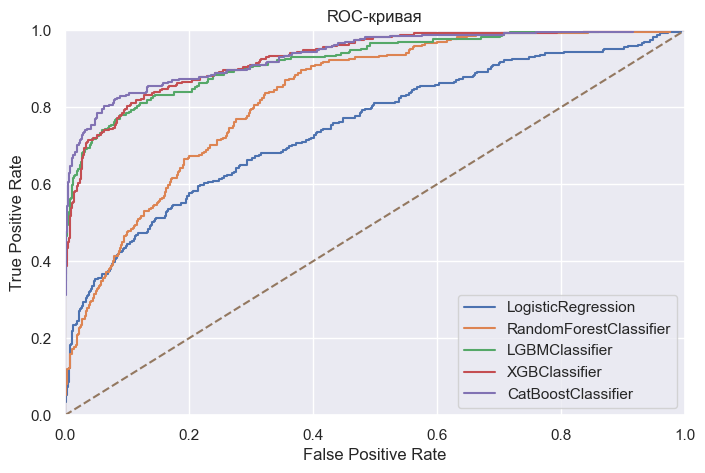

In [223]:
plot_all_roc(roc_curve_dict)

### Вывод

Все модели, кроме LogisticRegression, показывают результат AUC_ROC выше 0,82 на тренировочной выборке. Самый высокий показатель по  roc_auc_train и cross_val_predict имеет модель CatBoostClassifier.  Время обучения на лучшей модели на всей тренировочной выборке примерно такое же, как у остальных моделей<br>
Также график roc-auc для данной модели имеет не только большую площадь, но и максимальный угол наклона кривой<br>


<div class="alert alert-block alert-danger">
<h3> Комментарий тимлида (код)<a class="tocSkip"></h3>

<b>На доработку🤔:</b> Гридсерч уже содержит в себе этап кросс-валидации, именно кросс-валидационная метрика и выводится в best_score_, поэтому в самостоятельном проведении кросс-валидации нет необходимости, тем более что она у тебя проводится не корректно (разве мы можем задействовать тестовый набор при сравнении и выборе модели, если хотим добиться независимости и непредвзятости тестирования?)

<div class="alert alert-info">
<b>Доработка:</b>
<br>
cross_val_predict применяется на всех исходных данных, метод predict_proba. В качестве метрики используется AUC-ROC
</div>

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* Необходимо ли нам производить балансировку классов?
    
    
* Сейчас у тебя замерено время подбора параметров, которое по большей части будет зависеть от количества проверяемых комбинаций, поэтому по нему мало что можно сказать о скорости самой модели. 
    
    Тюнеры sklearn логируют времязатраты, чтобы достать, действуем так: `search.cv_results_['mean_fit_time'][search.best_index_]`, для времени предсказания достаем mean_score_time. Или можно использовать `search.refit_time_`, чтобы посмотреть, как долго выбранная лучшая модель потом обучалась уже на полном трейне.
    
    
* Для сравнения моделей по ROC может быть важно не только величина площади под кривой, но и то, как эта кривая растет, поэтому было бы неплохо наглядно изобразить данные кривые для каждой модели на одном графике. Подробнее <a href = 'https://stats.stackexchange.com/questions/304478/comparison-of-two-models-when-the-roc-curves-cross-each-other'>тут</a>. Чтобы провести именно валидационно сравнение, для получения предсказаний в данном случае лучше использовать <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html'>cross_val_predict</a> (обращаем внимание на параметр метода).
    
    
* Оценку важности логичнее провести уже только для лучшей модели. Дополнительно впоследствии можно заново пересобирать лучшую модель на ограниченном наборе признаков (а не заранее, чтобы была возможность контролировать спад качества), чтобы облегчить ее (может потребоваться заново подобрать параметры). Это может дать небольшой прирост в качестве за счет избавления от зашумленности, главное не переборщить.
    
    Кроме того вместо встроенной важности можно было бы посмотреть SHAP (ссылки оставляла в пачке), с помощью которого можно было бы также понять характер влияния каждого предиктора.

<div class="alert alert-info">
<b>Доработка:</b><br>
1. Так как используем ROC-AUC, то балансировку классов можно не проводить. В списке параметров параметров GRidSearch передается class_weigth<br>
    2. Для вычисления времени используется search.refit_time_<br>
    3. Все кривые ROC-AUC на одном графике<br>
    4. cross_val_predict применяется на всех исходных данных, метод predict_proba. В качестве метрики используется AUC-ROC<br>
    5. Оценка рассматривается ниже
</div>

<div class="alert alert-info">
<b>Комментарий :</b>
    SHAP в процессе изучения
<br>

## Тестирование модели

По результатам обучения и проверки моделей на кросс-валидационной метрике лучшей моделью стала:

In [224]:
def get_p(model,X_test,y_test):
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)
    print('Accuracy: ', round(model.score(X_test, y_test), 3))
    print('Presicion: ', round(precision_score(y_test, pred_test), 3))
    print('Recall: ', round(recall_score(y_test, pred_test), 3))
    print('AUC-ROC: ', round(roc_auc_score(y_test, pred_proba_test), 3))

### Определение лучшей модели

In [225]:
nm = model_param[model_param.cross_val_predict== model_param.cross_val_predict.max()].iloc[0,0]

In [226]:
nm

'CatBoostClassifier'

In [227]:
best_model = model_param[model_param.roc_auc_train == model_param.roc_auc_train.max()].iloc[0,2]

In [228]:
best_model.get_params()

{'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'verbose': False,
 'max_depth': 5,
 'n_estimators': 500,
 'random_state': 190623}

In [229]:
get_p(best_model,X_test,y_test)

Accuracy:  0.939
Presicion:  0.913
Recall:  0.665
AUC-ROC:  0.934


### Оценка важности параметров

In [230]:
importances = best_model.feature_importances_

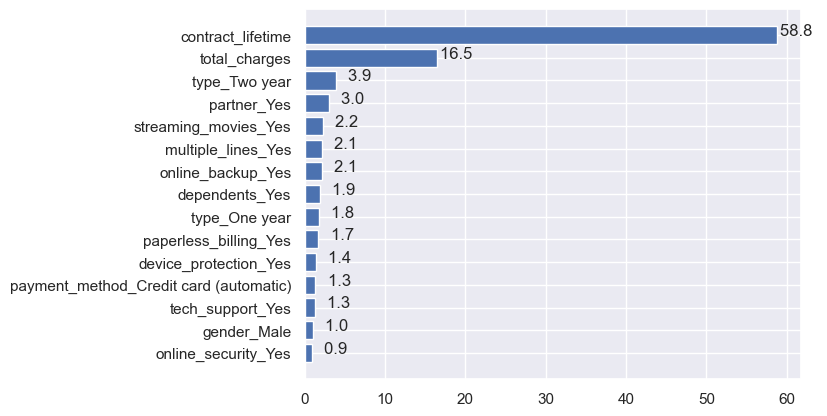

In [231]:
lf = feature_importance(importances,space=5)

In [232]:
lf = pd.DataFrame(lf.items(),columns=['feature','koef'])

In [233]:
lf

,feature,koef
0,contract_lifetime,58.785183
1,total_charges,16.464403
2,type_Two year,3.918990
3,partner_Yes,2.981906
4,streaming_movies_Yes,2.243351
5,multiple_lines_Yes,2.149763
6,online_backup_Yes,2.124877
7,dependents_Yes,1.895627
8,type_One year,1.766545
9,paperless_billing_Yes,1.731334


### Обучение модели на отобранных столбцах

В расчет принимаются коэффициенты, значение которых больше 1,5

In [234]:
lf = lf[lf['koef']>lf['koef'].median()]

In [235]:
select_feature1 = list(lf['feature'])

In [236]:
select_feature1

['contract_lifetime',
 'total_charges',
 'type_Two year',
 'partner_Yes',
 'streaming_movies_Yes',
 'multiple_lines_Yes',
 'online_backup_Yes']

Восстановление тренировочной выборки на момент отбора признаков (п.6.5)

In [237]:
X1_train,y_train,X1_test, y_test,X1,y1 = make_select_data(df_full)

In [238]:
X_train = X1_train[select_feature1]

In [239]:
X_test = X1_test[select_feature1]

In [240]:
X_train.shape

(5282, 7)

In [241]:
X_test.shape

(1761, 7)

In [242]:
mm = best_model.fit(X_train,y_train)

In [243]:
get_p(mm,X_test,y_test)

Accuracy:  0.941
Presicion:  0.91
Recall:  0.68
AUC-ROC:  0.935


### Вывод:

Лучшей моделью стала **CatBoostClassifier**<br>
Показатели:<br>


In [244]:
get_p(best_model,X_test,y_test)

Accuracy:  0.941
Presicion:  0.91
Recall:  0.68
AUC-ROC:  0.935


Модель имеет высокий показатель Accuracy: 0.943, то есть количество правильных прогнозов порядка 94%

Очень точно классифицирует Positive значения среди всех. И обнаруживает почти 70% образцов класса 1, то есть тех, кто ушел

Отбор столбцов и обучение на отобранных признаках не привели к росту метрик

<div class="alert alert-warning">
<h3> Комментарий тимлида (код)<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* На вебинаре обсуждали, что заказчику было бы интересно представить более подробный анализ того, как наша модель ошибается, и к каким потерям и прибыли это может потенциально приводить. Для этого можно вывести матрицу ошибок и проанализировать ее с точки зрения того, какие убытки и прибыль может приносить наша модель, совершая ошибки того или иного рода, каким образом в этом случае лучше выбирать порог вероятности, разделяющей классы.
    
    
* Функция predict дефолтно использует порог вероятности 0.5 для разделения на классы, но он может быть не совсем оптимален с учетом бизнес-задачи и соотношения прибыль/издержки. Подробнее как можно определить более оптимальный <a href = 'https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/'>тут</a> (пример подхода, мы же можем попробовать обосновать выбор через расчет прибыли и издержек, для расчетов можно брать средние показатели ежемесячных трат и соотносить их правильными и неправильными ответами модели).

<div class="alert alert-info">
<b>Доработка:</b><br>
</div>

### Матрица ошибок

В качестве средства проверки модели на ошибки рассматривается матрица ошибок.

Матрица ошибок при пороге 0,5

In [245]:
y_test.value_counts()

0    1492
1     269
Name: target, dtype: int64

In [246]:
best_pred = best_model.predict_proba(X_test)[:,1] > 0.5
cm1 = confusion_matrix(y_test,best_pred)
tn, fp, fn, tp= cm1.ravel()

In [247]:
cm1

array([[1474,   18],
       [  86,  183]], dtype=int64)

In [248]:
print(f'TP (нелояльные клиенты правильно определены как нелояльные) {tp}')
print(f'TN (лояльные клиенты правильно определены как лояльные) {tn}')
print(f'FP (лояльные клиенты неправильно определены как нелояльные) {fp}')
print(f'FN (нелояльные клиенты неправильно определены как лояльные) {fn}')


TP (нелояльные клиенты правильно определены как нелояльные) 183
TN (лояльные клиенты правильно определены как лояльные) 1474
FP (лояльные клиенты неправильно определены как нелояльные) 18
FN (нелояльные клиенты неправильно определены как лояльные) 86


В данном случае клиенты, которые ушли и им не предложили бонусов (97 чел) принесут убытки, чем затраты на бонусы для их удержания

В качестве совершенствования модели осуществим поиск порога, при котором будет более оптимальное разделение на классы Лояльный-НЕлояльный с точки зрения соотношения прибыль/издержки.<br>
В качестве метрики будет выбрана f1-мера

In [249]:
tr,f1 =  tuning_threhold(best_model)

Threshold=0.408, F-Score=0.80244


Найденный порог

In [250]:
tr

0.40800000000000003

In [251]:
best_pred = best_model.predict_proba(X_test)[:,1] > tr
cm2 = confusion_matrix(y_test,best_pred)

tn, fp, fn, tp= cm2.ravel()

In [252]:
cm2

array([[1467,   25],
       [  72,  197]], dtype=int64)

In [253]:
print(f'TP (нелояльные клиенты правильно определены как нелояльные) {tp}')
print(f'TN (лояльные клиенты правильно определены как лояльные) {tn}')
print(f'FP (лояльные клиенты неправильно определены как нелояльные) {fp}')
print(f'FN (нелояльные клиенты неправильно определены как лояльные) {fn}')


TP (нелояльные клиенты правильно определены как нелояльные) 197
TN (лояльные клиенты правильно определены как лояльные) 1467
FP (лояльные клиенты неправильно определены как нелояльные) 25
FN (нелояльные клиенты неправильно определены как лояльные) 72


Уменьшение порога позволяет более точно классифицировать нелояльных клиентов, что приводит к повышению затрат на бонусы, но меньше возможные убытки от ухода. В то же время менее точно классифицируются лояльные, что приводит к ненужным затратам на бонусы и этим клиентам. Но возможные убытки от уходя без предоставления бонусов все равно больше. К тому же клиентам будет приятно и они даже и не подумают об уходе, хотя модель посчитала их, значит, возможно, они тоже где-то близки к уходу

## Общий вывод

В ходе выполнения работы были загружены и изучены данные. Дубликатов и аномальных данных обнаружено не было. Данные были собраны в один датафрейм. Были созданы новые признаки target и contract_life, задействованные впоследствии в исследовательском анализе и при обучении моделей<br>

На этапе предобработки были удажены пропуски, появившиеся при объединении моделей, изменены названия столбцов в соответсвии с принятым стилем в программировании, изменены значения бинарных столбцов на 0 и 1, приведены в соответсвие типы данных.<br>
Исследовательский анализ данных позволил составить портрет уходящего абонента, который стоит рассмотреть в качестве отправной точки при принятии решений, направленных на предотвращение потери абонентов в компании провайдера. <br>

Исслдедование мультиколлинеарности данных не выявило серьезных зависимостей признаков друг от друга, за исключенией умеренной зависимости признака month_charges, который был исключен впоследствии из работы. С целевым признаком корреляции не выявлено.<br>

Данные были разделены только на тренировочную и тестовую выборки, по причине использования при обучении моделей GridSearchCV, используеющего кросс-валидацию. С помощью алгоритма RFE были отобраны 5 признаков для последующего обучения моделей.<br>
Были рассмотрены модели машинного обучения  **LogisticRegression, RandomForestClassifier, CatBoostClassifier, XGBClassifier, LGBMClassifier**.

Были показаны следующие результаты:

In [254]:
model_param

,model,roc_auc_train,pointer,cross_val_predict,time
0,LogisticRegression,0.756755,"LogisticRegression(C=0.5272631578947369, n_job...",0.750,0.018981
1,RandomForestClassifier,0.817115,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.827,2.731205
2,LGBMClassifier,0.889208,"LGBMClassifier(max_depth=5, min_child_samples=...",0.920,0.230760
3,XGBClassifier,0.893387,"XGBClassifier(base_score=None, booster=None, c...",0.914,0.260731
4,CatBoostClassifier,0.918008,<catboost.core.CatBoostClassifier object at 0x...,0.931,2.158168


Модели градиентного бустинга показали результаты по метрике AUC_ROC > 0.85

Лучшей моделью стала **CatBoostClassifier**<br>
Показатели:<br>
**Accuracy: 0.943<br>**
Presicion: 0.92<br>
Recall: 0.684<br>
**AUC-ROC: 0.936<br>**

**Заказчику рекомендовано** использовать данную модель для идентификации потенциально нелояльных компании клиентов и использовать составленный портрет пользователя для принятися решений и предоставлении скидок и промокодов для абонентов. Так же необходимо предоставить больше данных, указанных в разделе **Вопросы к заказчику** для создания более точной модели.
    

**Время выполнения тетрадки**

In [255]:
end_note_time = timer()
full_note_time = (end_note_time - start_note_time)

In [256]:
print(f'Время выполнения тетрадки: {round(full_note_time/60)} минут')

Время выполнения тетрадки: 20 минут


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по моделированию**

Дмитрий, в целом движемся в верном направлении, но над некотрыми моментами еще необходимо поработать. 
    
<span style='color:red'>Необходимо скорретировать:   
* Подход к кодированию признаков 
* Разобраться, что должно использоваться для сравнения моделей
</span>
  
<span style='color:orange'>На что рекомендую обратить внимание:     
* Опробовать использование пайплайнов
* Дополнить анализ итоговой модели анализом матрицы ошибок и подобрать оптимальный порог
</span>
    

**Успехов!** 😉

In [257]:
<div class="alert alert-info">
<b>Комментарий 2:</b>
    Код изменен
<br>

SyntaxError: invalid syntax (2651069533.py, line 1)